In [48]:
import pandas as pd
data = pd.read_csv("./Book2.csv")
data

,Эксперт,Терм,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,1,низкая,1,1,1,1,1,0,0,0,0,0
1,1,средняя,0,0,0,0,0,1,1,1,0,0
2,1,высокая,0,0,0,0,0,0,0,0,1,1
3,2,низкая,1,1,1,1,0,0,0,0,0,0
4,2,средняя,0,0,0,0,1,1,1,1,0,0
5,2,высокая,0,0,0,0,0,0,0,1,1,1
6,3,низкая,1,1,1,1,0,0,0,0,0,0
7,3,средняя,0,0,0,1,1,1,1,0,0,0
8,3,высокая,0,0,0,0,0,0,0,1,1,1
9,4,низкая,1,1,1,0,0,0,0,0,0,0


Таблица экспертных оценок

In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Эксперт  15 non-null     int64 
 1   Терм     15 non-null     object
 2   0.1      15 non-null     int64 
 3   0.2      15 non-null     int64 
 4   0.3      15 non-null     int64 
 5   0.4      15 non-null     int64 
 6   0.5      15 non-null     int64 
 7   0.6      15 non-null     int64 
 8   0.7      15 non-null     int64 
 9   0.8      15 non-null     int64 
 10  0.9      15 non-null     int64 
 11  1.0      15 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 1.5+ KB
None


Демонстрация общего количества колонок таблицы

In [52]:
col0_uniq_num = len(data.iloc[:, 0].unique())
print(col0_uniq_num)

5


Подсчёт экспертов

In [53]:
col_1_uniq = data.iloc[:, 1].unique()
print(col_1_uniq)

['низкая' 'средняя' 'высокая']


Выделение термов

In [66]:
df = pd.DataFrame()
df.insert(0, data.columns[1], col_1_uniq)
for i in range(2, len(data.columns)):
    df.insert(i - 1, data.columns[i], 0, allow_duplicates=False)
df

,Терм,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,низкая,0,0,0,0,0,0,0,0,0,0
1,средняя,0,0,0,0,0,0,0,0,0,0
2,высокая,0,0,0,0,0,0,0,0,0,0


Создание таблицы для расчета функции принадлежности

In [67]:
rows = len(data.index)
columns = len(data.columns)

for k in range(len(df.index)):
    for i in range(rows):
        if data.iloc[i, 1] == df.iloc[k, 0]:
            for j in range(2, columns):
                df.iloc[k, j - 1] += data.iloc[i, j]
df

,Терм,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,низкая,5,5,5,3,1,0,0,0,0,0
1,средняя,0,0,1,3,4,5,4,2,0,0
2,высокая,0,0,0,0,0,0,1,4,5,5


Подсчет экспертных оценок для каждого терма

In [68]:
for i in range(len(df.index)):
    for j in range(1, len(df.columns)):
        if df.iloc[i, j] > 0:
            df.iloc[i, j] /= col0_uniq_num
df

,Терм,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,низкая,1,1,1.0,0.6,0.2,0,0.0,0.0,0,0
1,средняя,0,0,0.2,0.6,0.8,1,0.8,0.4,0,0
2,высокая,0,0,0.0,0.0,0.0,0,0.2,0.8,1,1


Вычисление функции принадлежности

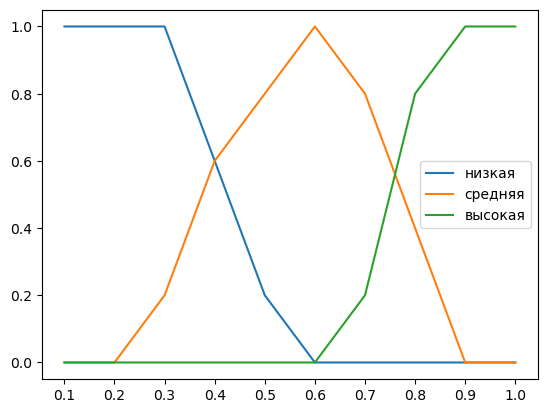

In [69]:
import matplotlib.pyplot as plt

x = {}
for i in range(len(df.index)):
    x[i] = df.drop(columns=df.columns[0]).iloc[i]

for i in range(len(x)):
    plt.plot(df.columns[1:], x[i])

plt.legend(df.iloc[:, 0])
plt.show()


График

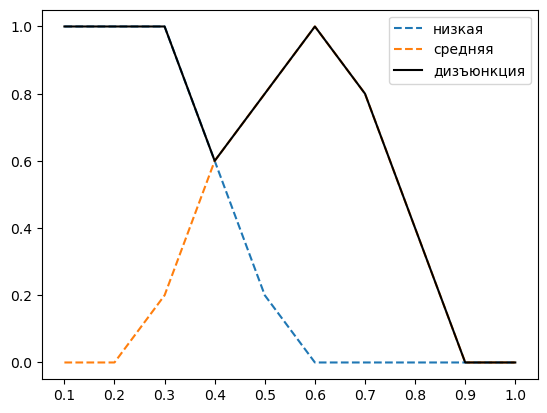

In [58]:
import matplotlib.pyplot as plt

l1, = plt.plot(x[0], linestyle='--')
l2, = plt.plot(x[1], linestyle='--')
l3, = plt.plot(pd.concat([x[0], x[1]]).groupby(level=0).max(), color='k')
plt.legend([l1, l2, l3], [df.iloc[0, 0], df.iloc[1, 0], 'дизъюнкция'])
plt.show()

Дизъюнкция

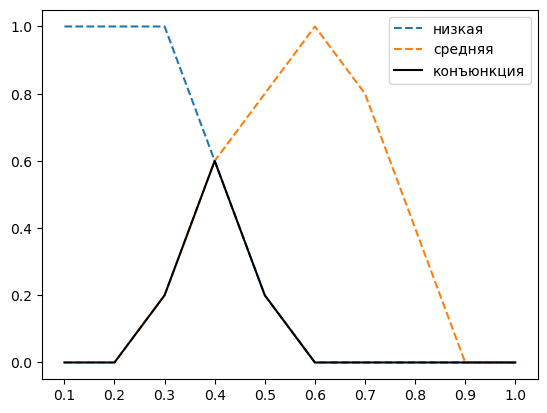

In [59]:
import matplotlib.pyplot as plt

l1, = plt.plot(x[0], linestyle='--')
l2, = plt.plot(x[1], linestyle='--')
conj = pd.concat([x[0], x[1]]).groupby(level=0).min()
l3, = plt.plot(conj, color='k')
plt.legend([l1, l2, l3], [df.iloc[0, 0], df.iloc[1, 0], 'конъюнкция'])
plt.show()

Конъюнкция

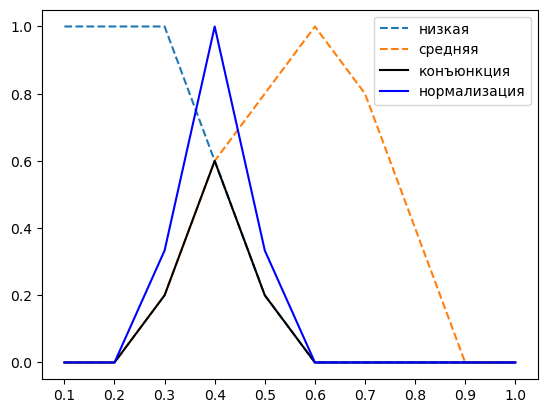

In [60]:
norm_conj = conj / conj.max()
l1, = plt.plot(x[0], linestyle='--')
l2, = plt.plot(x[1], linestyle='--')
l3, = plt.plot(conj, color='k')
l4, = plt.plot(norm_conj, color='b')
plt.legend([l1, l2, l3, l4], [df.iloc[0, 0], df.iloc[1, 0], 'конъюнкция', 'нормализация'])
plt.show()

Нормализация множества

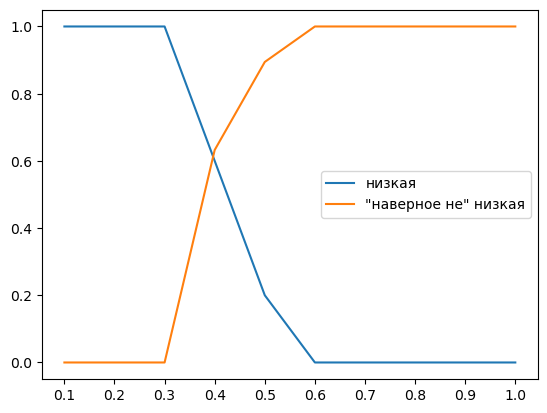

In [61]:
import math
import matplotlib.pyplot as plt
import copy

not_x0 = copy.deepcopy(x[0])
for i in range(len(x[0])):
    not_x0[i] = 1 - x[0][i]

dil = copy.deepcopy(not_x0)
for i in range(len(not_x0)):
    dil[i] = math.sqrt(not_x0[i])

l1, = plt.plot(x[0])
l2, = plt.plot(dil)
plt.legend([l1, l2], [df.iloc[0, 0], '"наверное не" ' + df.iloc[0, 0]])
plt.show()

Квантификатор "наверное не"